In [1]:
import pandas as pd
import numpy as np
import feather

from tqdm import tqdm

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
from feature_gen import add_out_of_operation_features, add_penultimate_week
from feature_gen import add_trend_features

from outliers import remove_outliers

In [4]:
df_pays = feather.read_dataframe('data/df_pays_na_test.feather')
df_pays['out_of_operation'] = df_pays.pays_count.isnull().astype('float')

In [5]:
shops = df_pays.shop_id.unique()
shops = sorted(shops)

In [8]:
dfs = []

for i in tqdm(shops):
    df_shop = df_pays[df_pays.shop_id == i].reset_index(drop=1)
    
    remove_outliers(df_shop)
    
    add_penultimate_week(df_shop)
    add_out_of_operation_features(df_shop)
    add_trend_features(df_shop)

    dfs.append(df_shop)

100%|██████████| 2000/2000 [59:36<00:00,  1.45s/it]


In [9]:
truncated_dfs = []

for df in dfs:
    df = df.iloc[7 * 2 * 3:]
    truncated_dfs.append(df)

In [10]:
df_features = pd.concat(truncated_dfs).reset_index(drop=1)

In [11]:
for c in df_features.columns:
    if 'trend' not in c or 'coeff' in c:
        continue
    print(c)
    df_features.loc[df_features[c] <= 1, c] = 1

trend_overall
trend_overall_dow
trend_overall_weekend


In [12]:
feather.write_dataframe(df_features, 'features/base_features_no_outliers.feather')

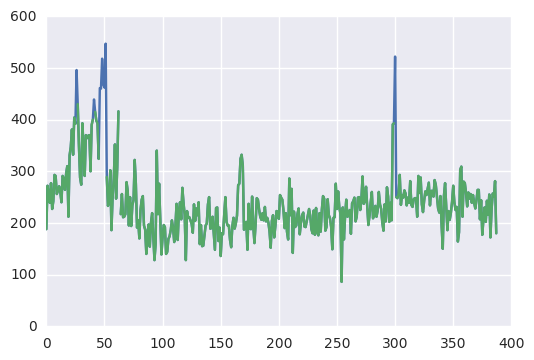

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(df_shop.days_from_beginning, df_shop.pays_count)
remove_outliers(df_shop)
plt.plot(df_shop.days_from_beginning, df_shop.pays_count)